In [135]:
import curve_trades as ct
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import widgets

In [136]:
w = widgets.Dropdown(
    options=['IG', 'EU'],
    value='IG',
    description='Index:',
    disabled=False,
)
w

In [137]:
index = w.value

In [138]:
#On the run spread differences
spreads_diff = ct.curve_spread_diff(index, 6)
spreads_diff.plot()

<IPython.core.display.Javascript object>

In [139]:
#Table of Spread Differences, and Z-score of current spread differences
ct.spreads_diff_table(spreads_diff)

<IPython.core.display.Javascript object>

3-5        5-7       7-10       5-10
min      24.179207  18.932223  12.110608  31.924565
max      34.068608  27.213778  22.397303  48.664671
mean     29.358655  23.756332  18.035087  41.791419
current  27.712660  24.911450  18.992275  43.903725
zscore   -0.749325   0.503029   0.610201   0.641449

In [140]:
#Theta per unit duration
ct.theta_matrix_by_series(index)

tenor   3yr  5yr  7yr  10yr
series                     
23      NaN  NaN  NaN   NaN
24      NaN  NaN  NaN   NaN
25      NaN  NaN  NaN   NaN
26      NaN  NaN  NaN   NaN
27      NaN  NaN  NaN   NaN
28      NaN  NaN  NaN   NaN
29      NaN  NaN  NaN   NaN

In [141]:
#on the run theta
ct.on_the_run_theta(index)

<IPython.core.display.Javascript object>

In [142]:
#Curve Trade returns
ct.curve_returns()

3-5    3-5-10       3-7      5-10      7-10
Sharpe                       0.211386  1.523687 -0.491073  2.592219  1.341185
Mean Worst 10 Days DrawDown -0.000748 -0.001212 -0.000872 -0.000646 -0.000639
Monthly Sharpe               0.365536  1.795681 -0.536642  1.834057  1.236990

In [143]:
ct.cross_series_curve(index)

In [144]:
#Theta with 3-5-10 Strategy
df = ct.ratio_within_series(param='duration')
ct.curve_3_5_10(df)

<IPython.core.display.Javascript object>

In [145]:
#Theta with 5-10 Strategy
df = ct.ratio_within_series(param='duration')
ct.curve_5_10(df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


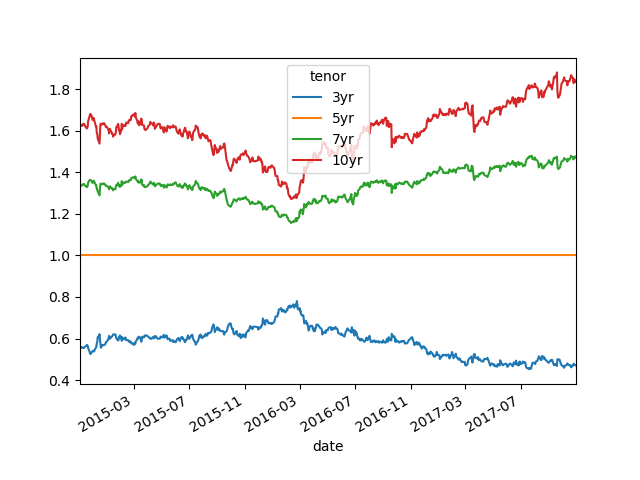

In [149]:
#Relative Spread Difference
spread_ratio = ct.ratio_within_series(param = 'closespread')
spread_ratio.groupby(level = ['date']).last()['closespread_ratio_to_5yr'].plot()

/home/edwin/projects/code/python/exploration/curve_trades.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  #dr/dspread = exp(k) + spread_coeff * duration ^ dur_coeff * spread ^ (spread_coeff-1)
/usr/lib/python3.6/site-packages/pandas/core/frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/home/edwin/projects/code/python/exploration/curve_trades.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

<IPython.core.display.Javascript object>


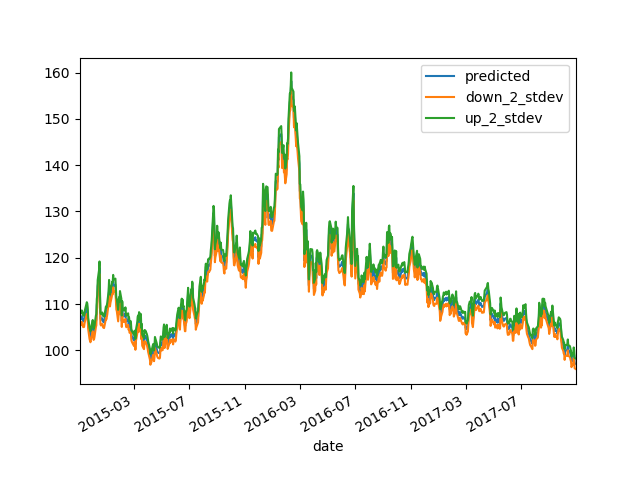

/home/edwin/projects/code/python/exploration/curve_trades.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return df


In [150]:
model = ct.curve_model()
model_results = ct.curve_model_results(model[0], model[1])

In [ ]:
model[1].summary()

In [ ]:
#Var on current position
results = ct.curve_var()

In [ ]:
results
#first number: at 5% flatness
#second number: at predicted curve shape
#third number: at 5% flatness given duration and spread